Import the libraries necessary to analize data

In [8]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import random
import seaborn as sns
import plotly.express as px

In [9]:
df = pd.read_csv('df_scaled.csv')

In [10]:
column_to_drop = ['n_participants','n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed','date', 'latitude', 'longitude','congressional_district', 'candidatevotes', 'totalvotes', 'total_votes_for_state', 'involve_killing', 'pc1', 'pc2']
for col in df.columns:
    if df[col].dtype == 'object':
       column_to_drop.append(col)
column_to_drop

['n_participants',
 'n_participants_child',
 'n_participants_teen',
 'n_participants_adult',
 'n_males',
 'n_females',
 'n_killed',
 'n_injured',
 'n_arrested',
 'n_unharmed',
 'date',
 'latitude',
 'longitude',
 'congressional_district',
 'candidatevotes',
 'totalvotes',
 'total_votes_for_state',
 'involve_killing',
 'pc1',
 'pc2',
 'date',
 'state',
 'city_or_county',
 'incident_characteristics1',
 'party']

In [11]:
df_categorical = df[column_to_drop]
df_numeric = df.drop(columns=column_to_drop)

In [12]:
df_categorical.info()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197914 entries, 0 to 197913
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   n_participants             197914 non-null  float64
 1   n_participants_child       197914 non-null  int64  
 2   n_participants_teen        197914 non-null  int64  
 3   n_participants_adult       197914 non-null  int64  
 4   n_males                    197914 non-null  float64
 5   n_females                  197914 non-null  float64
 6   n_killed                   197914 non-null  float64
 7   n_injured                  197914 non-null  float64
 8   n_arrested                 197914 non-null  float64
 9   n_unharmed                 197914 non-null  float64
 10  date                       197914 non-null  object 
 11  latitude                   197914 non-null  float64
 12  longitude                  197914 non-null  float64
 13  congressional_district     19

# K-means

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

Knee Method to estimate the best K

In [14]:
k_grid = [2, 3, 4, 10, 100, 1000]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_numeric)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_

    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

In [15]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse']) # cohesion, lower value better clustering (error minimization)
    current_bouldin = metrics.davies_bouldin_score(df_numeric, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin) # lower value, better clustering (minimum zero)
    
    current_silhouette = silhouette_score(df_numeric, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 2843113.5809587864
Separation 1.9367457647016886
Silhouette 0.1833461209224822
for k = 3
SSE 2345810.6273662164
Separation 1.6263150261319306
Silhouette 0.2355086568397966
for k = 4
SSE 1949275.2646678889
Separation 1.4568004125695726
Silhouette 0.2694844744495429
for k = 10
SSE 1231147.3199379446
Separation 1.6446613575845177
Silhouette 0.2759970961853827
for k = 100
SSE 474549.9240813598
Separation 1.4798472571686645
Silhouette 0.22528987768382913
for k = 1000
SSE 175533.5431574055
Separation 1.4460552669616118
Silhouette 0.21366608580904203


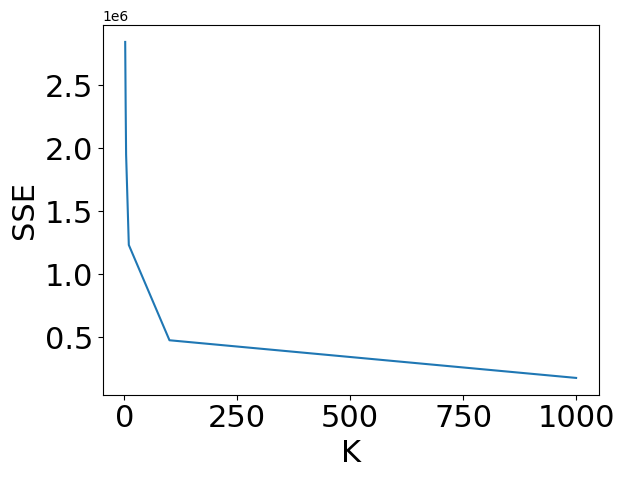

In [16]:
sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid,sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

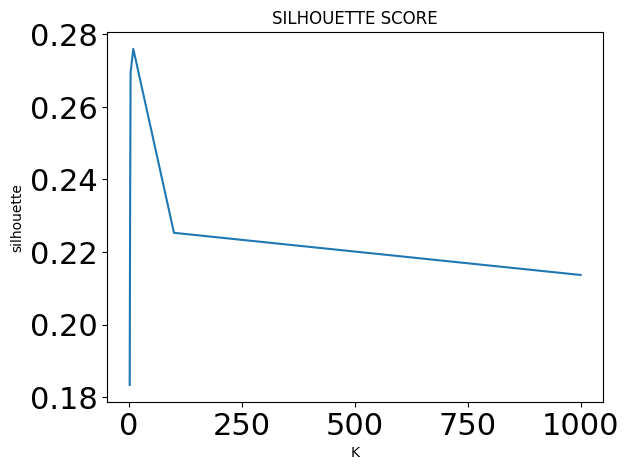

In [17]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
#plt.axvline(6)
plt.show()

From both elbow method and silhouette score, best K is around 4.

In [28]:
#RETRAIN BEST K-MEANS
best_k = 4
best_kmeans = KMeans(n_clusters=best_k, n_init=10, max_iter=100)
best_kmeans.fit(df_numeric)

KMeans(max_iter=100, n_clusters=4, n_init=10)

In [30]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster occurrencies:', occ_list)

cluster occurrencies: [41146, 69333, 39982, 47453]


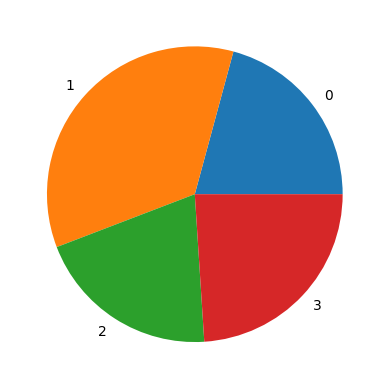

In [31]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

In [ ]:
""" sns.pairplot(df,hue='labels', palette=sns.color_palette(n_colors=n_clusters))
plt.show() """

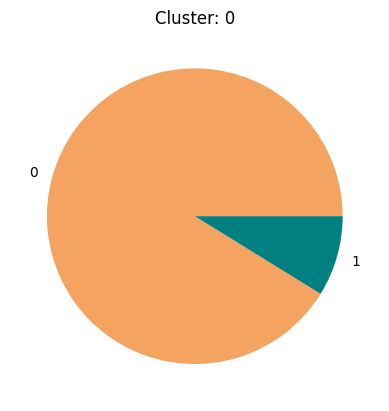

involve_killing
0    37525
1     3621
Name: count, dtype: int64


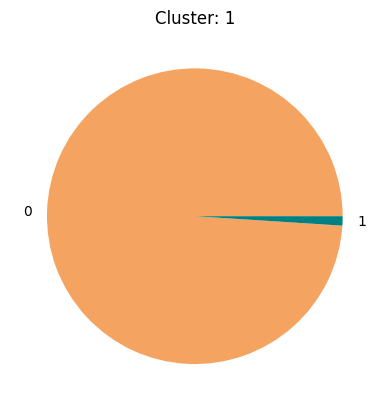

involve_killing
0    68626
1      707
Name: count, dtype: int64


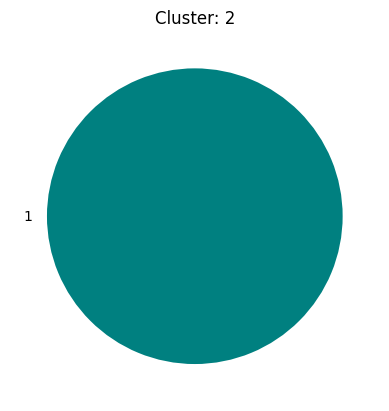

involve_killing
1    39982
Name: count, dtype: int64


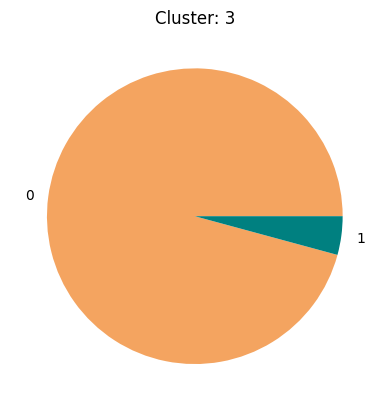

involve_killing
0    45452
1     2001
Name: count, dtype: int64


In [32]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))
dict_colors_involve_killing = { 1: 'teal', 0: 'sandybrown'}


for k in range(n_clusters):
    # Get 'bot' values for elems in cluster k
    killing_for_clust = df_categorical['involve_killing'].loc[best_kmeans.labels_ == k].value_counts()
    # Show pie plot
    labels = ['not-killed', 'killed']
    plt.title('Cluster: ' + str(k))
    plt.pie(killing_for_clust, labels= killing_for_clust.index, colors=[dict_colors_involve_killing[v] for v in killing_for_clust.keys()])
    plt.show()
    print(killing_for_clust)

# X Means 
#### from: https://github.com/annoviko/pyclustering/

In [24]:
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [25]:
start_centroids = 7
start_clusters = kmeans_plusplus_initializer(df_numeric, start_centroids, random_state=42).initialize()
 
x_means = xmeans(df_numeric, start_clusters, tolerance=1e-6, kmax=20, repeat=10, random_state=42)
x_means.process()
 
# Clustering results:
print(f'Number of clusters found:', np.shape(x_means.get_centers())[0])
print("SSE:", x_means.get_total_wce())

Number of clusters found: 20
SSE: 1016649.610261538


In [66]:
labels = {}
clusters = x_means.get_clusters()
n_clusters = np.shape(clusters)[0]
#transforming each cluster list from [[cluster1 m points], ...., [clustern p points]] to [[1,1,,....,1 m times], [n,....,n p times]] 
#to {point1:labelcluster1,...., pointm:labelcluster1, ....., point1:labelclustern, ...., pointp:labelclustern} sorted by number of example.
for cluster_label in range(0, n_clusters):
  for i in range(0, len(clusters[cluster_label])):
      labels[clusters[cluster_label][i]] = cluster_label

labels = dict(sorted(labels.items()))

In [46]:
print('Separation %s' % metrics.davies_bouldin_score(df_numeric, list(labels.values()))) # lower value, better clustering (minimum zero)
print('Silhouette %s' % silhouette_score(df_numeric, list(labels.values())))

Separation 1.4875285473263054
Silhouette 0.23796291915040135
